In [1]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline
from pyNA.pyna import pyna

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import scipy

In [2]:
# Compute liftoff distance stca
theta_flaps_lst = np.linspace(0, 25, 26)
if True: 
    py_stca = dict()

    for i,th in enumerate(theta_flaps_lst):

        py_stca[i] = pyna()
        py_stca[i].ac_name = 'stca'
        py_stca[i].case_name = 'stca'
        py_stca[i].output_directory_name = 'Flaps'
        py_stca[i].output_file_name = py_stca[i].ac_name + '_flaps_' + str(th) + '.sql'
        py_stca[i].engine_deck_name = 'engine_deck_stca.csv'
        py_stca[i].theta_flaps = th
        py_stca[i].save_results = True
        py_stca[i].tolerance = 1e-5
        py_stca[i].pkrot = True

        py_stca[i].compute_trajectory(objective='x_end')

        clear_output()

In [2]:
# Compute liftoff distance a10
theta_flaps_lst = np.linspace(0, 25, 26)
if True:
    py_a10 = dict()
    
    for i,th in enumerate(theta_flaps_lst):

        py_a10[i] = pyna()
        py_a10[i].ac_name = 'a10'
        py_a10[i].case_name = 'a10'
        py_a10[i].output_directory_name = 'Flaps'
        py_a10[i].output_file_name = py_a10[i].ac_name + '_flaps_' + str(th) + '.sql'
        py_a10[i].engine_deck_name = 'engine_deck_a10.csv'
        py_a10[i].theta_flaps = th
        py_a10[i].save_results = True
        py_a10[i].tolerance = 1e-5
        py_a10[i].pkrot = True

        py_a10[i].compute_trajectory(objective='x_end')

        clear_output()

--- Linkage Report [phases] ---
    --- groundroll - rotation ---
        time           [final] ==  time           [initial]
        states:x       [final] ==  states:x       [initial]
        states:v       [final] ==  states:v       [initial]
        states:alpha   [final] ==  states:alpha   [initial]
    --- rotation - liftoff ---
        time               [final] ==  time             [initial]
        states:x           [final] ==  states:x         [initial]
        parameters:z       [final*] ==  states:z         [initial]
        states:v           [final] ==  states:v         [initial]
        states:alpha       [final] ==  controls:alpha   [initial]
        parameters:gamma   [final*] ==  states:gamma     [initial]
    --- liftoff - vnrs ---
        time             [final] ==  time             [initial]
        states:x         [final] ==  states:x         [initial]
        states:v         [final] ==  states:v         [initial]
        controls:alpha   [final] ==  controls:

/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/recorders/sqlite_recorder.py:224: UserWarning:The existing case recorder file, /Users/laurensvoet/Documents/Research/pyNA/pyNA/cases/a10/output/Flaps/a10_flaps_0.0.sql, is being overwritten.


Model viewer data has already has already been recorded for Driver.
Model viewer data has already has already been recorded for Driver.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-ebe315f6e4fa>", line 19, in <module>
    py_a10[i].compute_trajectory(objective='x_end')
  File "/Users/laurensvoet/Documents/Research/pyNA/pyNA/pyna.py", line 511, in compute_trajectory
    self.path.solve(run_driver=True, save_results=self.save_results)
  File "/Users/laurensvoet/Documents/Research/pyNA/pyNA/src/trajectory.py", line 613, in solve
    dm.run_problem(self, run_driver=run_driver)
  File "/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/dymos/run_problem.py", line 64, in run_problem
    failed = problem.run_driver()
  File "/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/core/problem.py", line 722, in run_driver
    return self.driver.run()
  File "/Users/laurensvoet/Library/Python/3.7/lib/pytho

  File "/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/jacobians/dictionary_jacobian.py", line 132, in _apply
    subjac = self._randomize_subjac(subjac_info['val'], abs_key)
  File "/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/openmdao/jacobians/jacobian.py", line 298, in _randomize_subjac
    r += 1.0
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/laurensvoet/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
    if (await self.run_code(code, resu

TypeError: object of type 'NoneType' has no len()

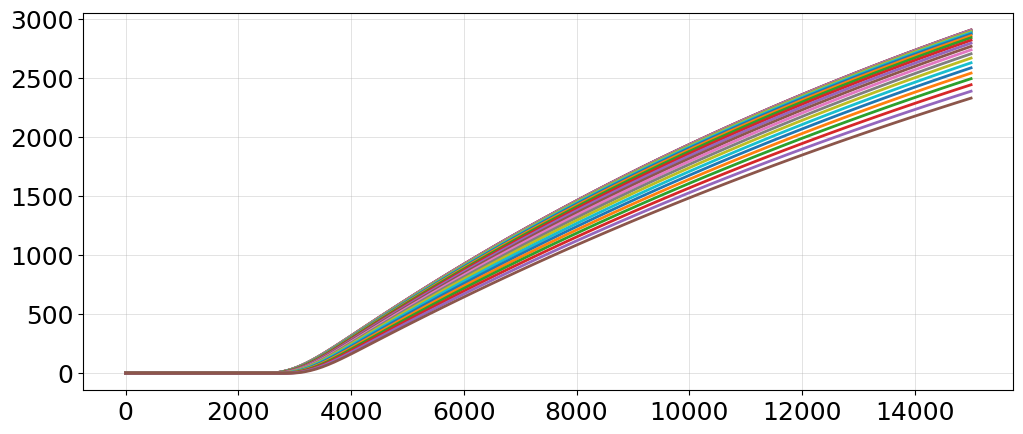

In [8]:
# Load distances 
calc = True
if calc:
    x_x = dict()
    for ac_name in ['stca']:#, 'a10']:

        x_x[ac_name] = dict()

        x_x[ac_name]['groundroll'] = np.zeros(26)
        x_x[ac_name]['rotation'] = np.zeros(26)
        x_x[ac_name]['liftoff'] = np.zeros(26)
        x_x[ac_name]['vnrs'] = np.zeros(26)
        x_x[ac_name]['cutback'] = np.zeros(26)
        x_x[ac_name]['k_rot'] = np.zeros(26)

        py = pyna()
        py.case_name = ac_name
        py.ac_name = ac_name
        py.output_directory_name = 'Flaps'
        py.initialize()
                        
        for i,th in enumerate(theta_flaps_lst):
            
            results = py.load_results(py.ac_name + '_flaps_' + str(th) + '.sql')
  
            plt.plot(results.get_val('trajectory.x'), results.get_val('trajectory.z'))

            x_x[ac_name]['groundroll'][i] = results.get_val('phases.groundroll.interpolated.states:x')[-1]
            x_x[ac_name]['rotation'][i] = results.get_val('phases.rotation.interpolated.states:x')[-1]
            x_x[ac_name]['liftoff'][i] = results.get_val('phases.liftoff.interpolated.states:x')[-1]
            x_x[ac_name]['vnrs'][i] = results.get_val('phases.vnrs.interpolated.states:x')[-1]
            x_x[ac_name]['cutback'][i] = results.get_val('phases.cutback.interpolated.states:x')[-1]
            x_x[ac_name]['k_rot'][i] = results.get_val('phases.groundroll.parameters:k_rot')

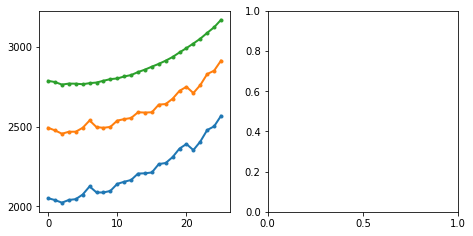

In [5]:
# Plot distances 
th_flaps_gr = dict()

fig, ax = plt.subplots(1,2, figsize=(7.5,3.7))
plt.style.use('../utils/plot.mplstyle')

for i, ac_name in enumerate(['stca']):#, 'a10']):
    
    for phase in ['groundroll', 'rotation', 'liftoff']:#, 'vnrs']:#, 'cutback']:

        ax[i].plot(theta_flaps_lst, x_x[ac_name][phase],'o-')


5.664070503401203
54.7180442573657


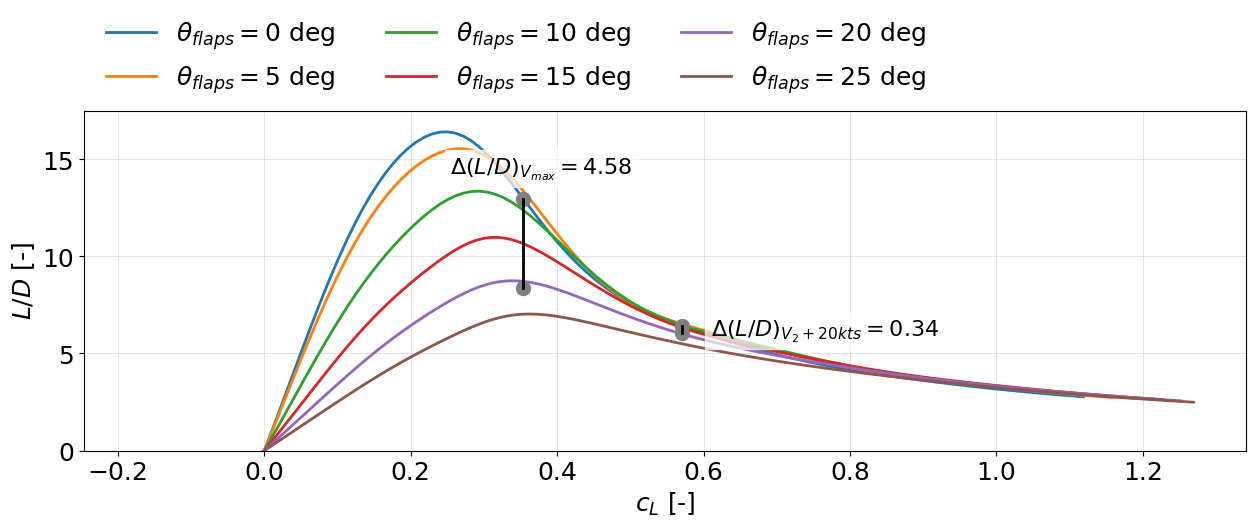

In [35]:
# Plot aerodynamics deck stca 
if True:
    pyna_settings = pyna.load_settings(case_name='stca')
    pyna_settings.ac_name = 'stca'
    py = pyna(settings = pyna_settings)
    py.ac.load_aerodynamics(settings=py.settings)

    # Create aerodynamics cubic interpolants 
    A  = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    TF = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    TS = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CL = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CLmax = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CD = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))

    cntr = -1
    for i, a in enumerate(py.ac.aero['alpha']):
        for j, tf in enumerate(py.ac.aero['theta_flaps']):
            for k, ts in enumerate(py.ac.aero['theta_slats']):
                cntr = cntr + 1
                A[cntr] = a
                TF[cntr] = tf
                TS[cntr] = ts
                CL[cntr] = py.ac.aero['c_l'][i,j,k]
                CLmax[cntr] = py.ac.aero['c_l_max'][i,j,k]
                CD[cntr] = py.ac.aero['c_d'][i,j,k]

    f_alpha = scipy.interpolate.Rbf(TS, TF, CL, A, function='cubic')

    f_L = scipy.interpolate.Rbf(A, TF, TS, CL, function='cubic')
    f_D = scipy.interpolate.Rbf(A, TF, TS, CD, function='cubic')
    f_LD = scipy.interpolate.Rbf(A, TF, TS, CL/CD, function='cubic')
    f_CLmax = scipy.interpolate.Rbf(A, TF, TS, CLmax, function='cubic')

    # Load engine deck
    py.settings.engine_file_name = 'engine_deck_stca.csv'
    py.engine.load_deck(py.settings)

    # Create engine deck interpolant
    F_n_interp = scipy.interpolate.RegularGridInterpolator((py.engine.deck['z'], py.engine.deck['M_0'], py.engine.deck['TS']), py.engine.deck['F_n'])

    plt.figure(figsize=(15,4.5))
    plt.style.use('../utils/plot.mplstyle')

    alpha = np.linspace(-2, 25, 100)

    for th_flaps in [0, 5, 10, 15, 20, 25]:
        ld = f_LD(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
        c_l = f_L(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
        plt.plot(c_l, ld, label=r'$\theta_{flaps}=$'+str(th_flaps)+' deg')

    for case in ['V_{2}+20 kts', 'V_{max}']:

        if case == 'V_{2}+20 kts':
            V = 197*0.51444444
        elif case == 'V_{max}':
            V = 250*0.51444444

        # Example
        mtow = py.ac.mtow
        S = py.ac.af_S_w
        rho = 1.225
        c_l = mtow*9.80665/(0.5*rho*V**2*S)


        a1 = f_alpha(-6, th_flaps_gr['stca'], c_l)
        a2 = f_alpha(-6, 0, c_l)

        LD_1 = f_LD(a1, th_flaps_gr['stca'], -6)
        LD_2 = f_LD(a2, 0, -6)

        print((LD_2-LD_1)/LD_1*100)

        plt.plot(c_l, LD_1, 'o', markersize=10, color='grey')
        plt.plot(c_l, LD_2, 'o', markersize=10, color='grey')

        plt.plot([c_l,c_l], [LD_1,LD_2], 'k')


        if case == 'V_{2}+20 kts':
            plt.annotate('$\Delta (L/D)_{'+case+'}=$'+str(np.round(LD_2-LD_1,2)), xy=(c_l+0.04, LD_2-0.5), fontsize=16, bbox=dict(facecolor='w', edgecolor='w', alpha=0.7))
        elif case == 'V_{max}':
            plt.annotate('$\Delta (L/D)_{'+case+'}=$'+str(np.round(LD_2-LD_1,2)), xy=(c_l-0.1, LD_2+1.3), fontsize=16, bbox=dict(facecolor='w', edgecolor='w', alpha=0.7))

    plt.ylim([0, 17.5])
    plt.xlabel(r'$c_L$ [-]')
    plt.ylabel(r'$L/D$ [-]')
    plt.legend(frameon=False, loc='lower left', bbox_to_anchor=(0,0.98), ncol=3)

0.7776336747925862
2.161502381155279


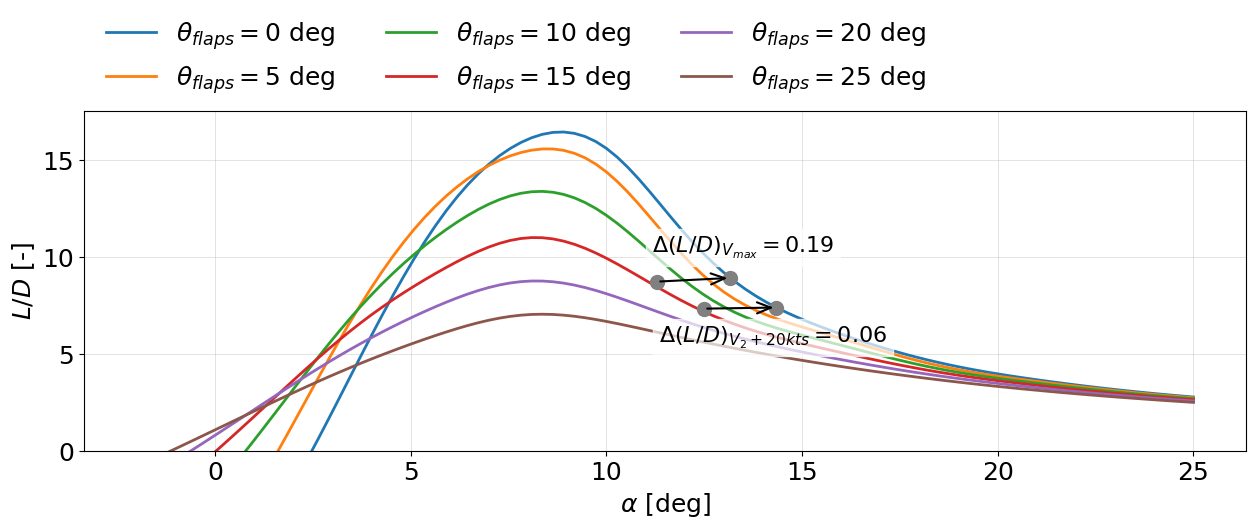

In [36]:
# Plot aerodynamics deck a10
if True:
    pyna_settings = pyna.load_settings(case_name='a10')
    pyna_settings.ac_name = 'a10'
    py = pyna(settings = pyna_settings)
    py.ac.load_aerodynamics(settings=py.settings)

    # Create aerodynamics cubic interpolants 
    A  = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    TF = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    TS = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CL = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))
    CD = np.zeros(np.size(py.ac.aero['alpha'])*np.size(py.ac.aero['theta_flaps'])*np.size(py.ac.aero['theta_slats']))

    cntr = -1
    for i, a in enumerate(py.ac.aero['alpha']):
        for j, tf in enumerate(py.ac.aero['theta_flaps']):
            for k, ts in enumerate(py.ac.aero['theta_slats']):
                cntr = cntr + 1
                A[cntr] = a
                TF[cntr] = tf
                TS[cntr] = ts
                CL[cntr] = py.ac.aero['c_l'][i,j,k]
                CD[cntr] = py.ac.aero['c_d'][i,j,k]

    f_LD = scipy.interpolate.Rbf(A, TF, TS, CL/CD, function='cubic')
    f_L = scipy.interpolate.Rbf(A, TF, TS, CL, function='cubic')
    f_D = scipy.interpolate.Rbf(A, TF, TS, CD, function='cubic')

    f_alpha = scipy.interpolate.Rbf(TS, TF, CL, A, function='cubic')

    plt.figure(figsize=(15,4.5))
    plt.style.use('../utils/plot.mplstyle')

    alpha = np.linspace(-2, 25, 100)

    for th_flaps in [0, 5, 10, 15, 20, 25]:
        ld = f_LD(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
        plt.plot(alpha, ld, label=r'$\theta_{flaps}=$'+str(th_flaps)+' deg')

    for case in ['V_{2}+20 kts', 'V_{max}']:

        if case == 'V_{2}+20 kts':
            V = 234.4*0.51444444
        elif case == 'V_{max}':
            V = 250*0.51444444

        # Example
        mtow = py.ac.mtow
        S = py.ac.af_S_w
        rho = 1.225
        c_l = mtow*9.80665/(0.5*rho*V**2*S)


        a1 = f_alpha(-6, th_flaps_gr['a10'], c_l)
        a2 = f_alpha(-6, 0, c_l)

        LD_1 = f_LD(a1, th_flaps_gr['a10'], -6)
        LD_2 = f_LD(a2, 0, -6)

        print((LD_2-LD_1)/LD_1*100)

        plt.plot(a1, LD_1, 'o', markersize=10, color='grey')
        plt.plot(a2, LD_2, 'o', markersize=10, color='grey')

        plt.annotate('', xy=(a2, LD_2), xycoords='data', xytext=(a1, LD_1), textcoords='data',
                     arrowprops=dict(arrowstyle="->, head_length=1., head_width=0.4", connectionstyle="arc3", lw=1.5), )

        if case == 'V_{2}+20 kts':
            plt.annotate('$\Delta (L/D)_{'+case+'}=$'+str(np.round(LD_2-LD_1,2)), xy=(a2-3, LD_2-1.8), fontsize=16, bbox=dict(facecolor='w', edgecolor='w', alpha=0.7))
        elif case == 'V_{max}':
            plt.annotate('$\Delta (L/D)_{'+case+'}=$'+str(np.round(LD_2-LD_1,2)), xy=(a2-2, LD_2+1.3), fontsize=16, bbox=dict(facecolor='w', edgecolor='w', alpha=0.7))

    plt.ylim([0, 17.5])
    plt.xlabel(r'$\alpha$ [deg]')
    plt.ylabel(r'$L/D$ [-]')
    plt.legend(frameon=False, loc='lower left', bbox_to_anchor=(0,0.98), ncol=3)